In [7]:
import datetime
import numpy as np
import numpy.ma as ma
from numpy import genfromtxt
from collections import defaultdict
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
pd.set_option("display.precision", 1)

from IPython.display import display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%run preprocessing_functions.ipynb

In [8]:
# Load the CSV file into a DataFrame (replace 'your_file.csv' with the actual file path)
# AVOID using these, use the copy versions instead
df_user = pd.read_csv('/Users/RuknuddinAsrari/Documents/541/github/COMP-541-Project/datasets/ml-latest-small/ratings.csv')
df_movie = pd.read_csv('/Users/RuknuddinAsrari/Documents/541/github/COMP-541-Project/datasets/ml-latest-small/movies.csv')
df_links = pd.read_csv('/Users/RuknuddinAsrari/Documents/541/github/COMP-541-Project/datasets/ml-latest-small/links.csv')
df_tags = pd.read_csv('/Users/RuknuddinAsrari/Documents/541/github/COMP-541-Project/datasets/ml-latest-small/tags.csv')


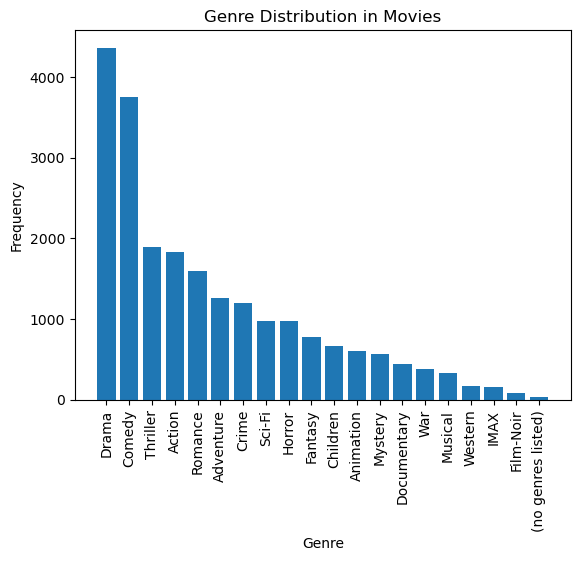

In [44]:
#Ruknuddin
import matplotlib.pyplot as plt

# Split the 'genres' column by '|' and stack the resulting series to create a single column of genre labels
genres = df_movie['genres'].str.split('|', expand=True).stack()

# Count the frequency of each genre label
genre_counts = genres.value_counts()

# Create a bar plot to visualize the genre distribution
plt.bar(genre_counts.index, genre_counts.values)

# Set labels for the x and y axes
plt.xlabel('Genre')
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Genre Distribution in Movies')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


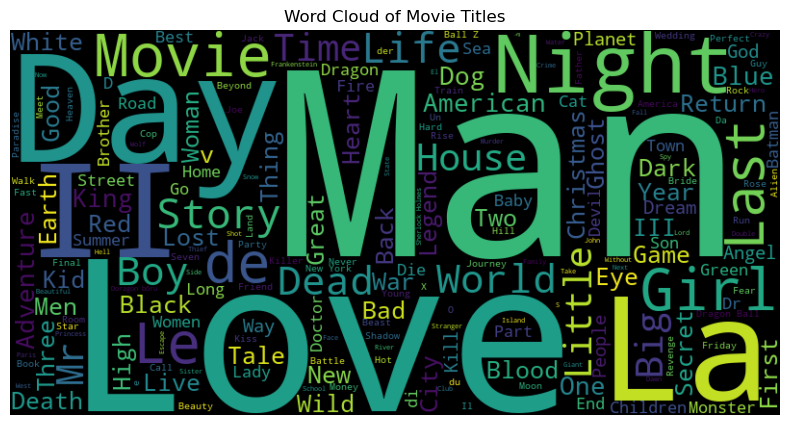

In [22]:
#Ruknuddin
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a Word Cloud based on the movie titles in the dataset
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df_movie['title']))

# Create a figure for the plot with a specific size
plt.figure(figsize=(10, 5))

# Display the Word Cloud image with specified interpolation
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis labels and ticks for a cleaner appearance
plt.axis('off')

# Set the title of the plot
plt.title('Word Cloud of Movie Titles')

# Display the plot
plt.show()


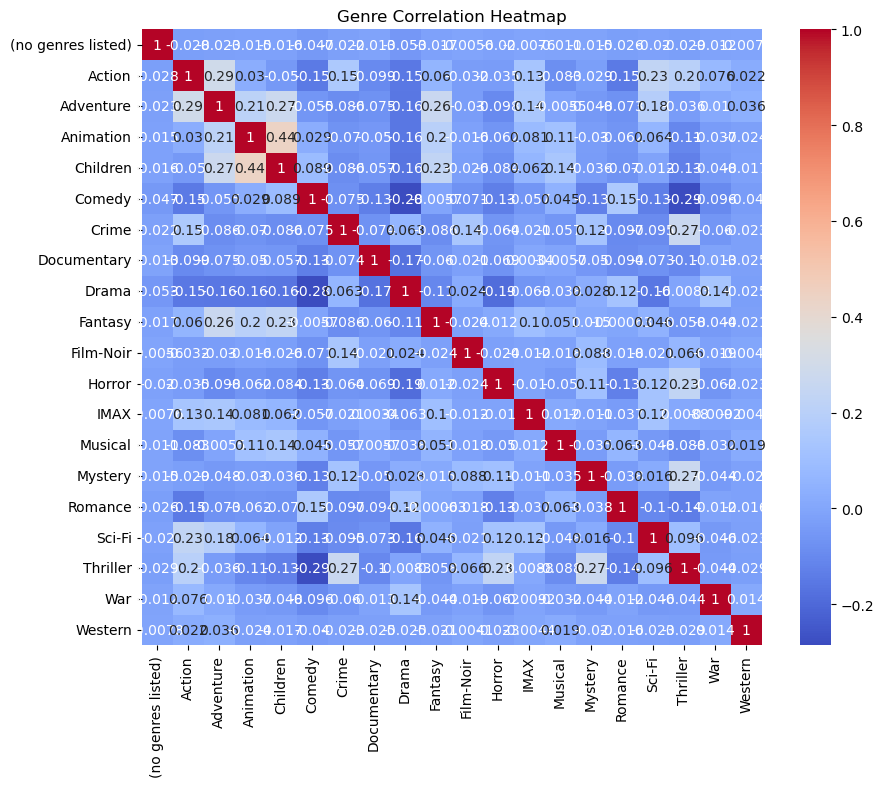

In [26]:
#Ruknuddin
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_movie contains the movie data
genre_columns = df_movie['genres'].str.get_dummies('|')

# Calculate the correlation between movie genres
genre_corr = genre_columns.corr()

# Create a figure for the plot with a specific size
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the genre correlation
sns.heatmap(genre_corr, cmap='coolwarm', annot=True)

# Set the title for the heatmap
plt.title('Genre Correlation Heatmap')

# Display the plot
plt.show()


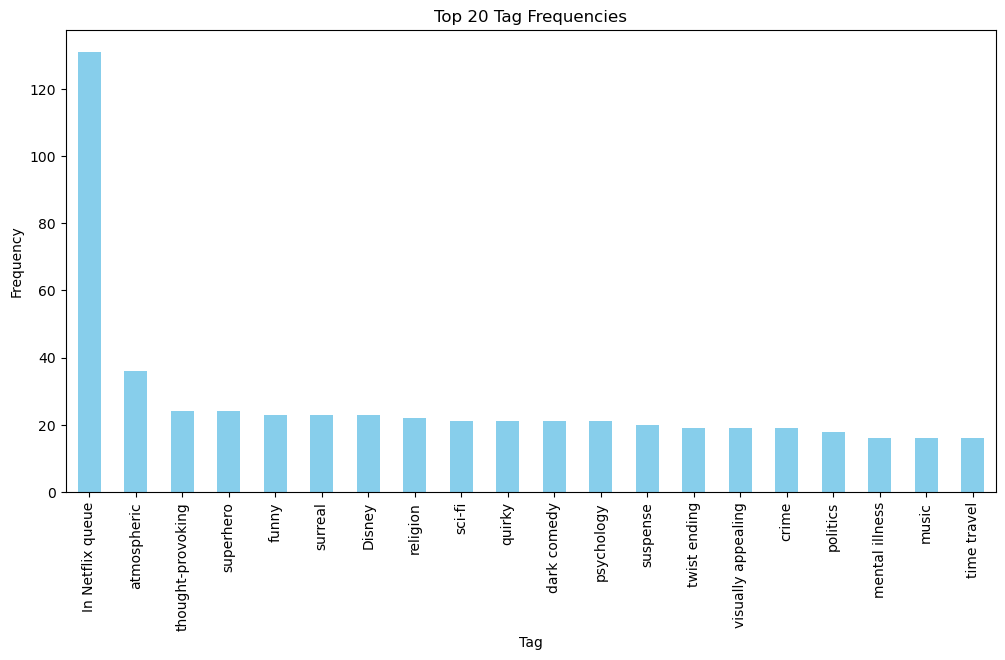

In [42]:
#Muhammed yousuf
# Import the necessary libraries
import matplotlib.pyplot as plt

# Assuming df_tags contains the tag data
tag_counts = df_tags['tag'].value_counts()

# Create a vertical bar plot
plt.figure(figsize=(12, 6))
tag_counts.head(20).plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Tag')             # Label for the x-axis
plt.ylabel('Frequency')       # Label for the y-axis
plt.title('Top 20 Tag Frequencies')  # Title of the plot

# Show the plot
plt.show()

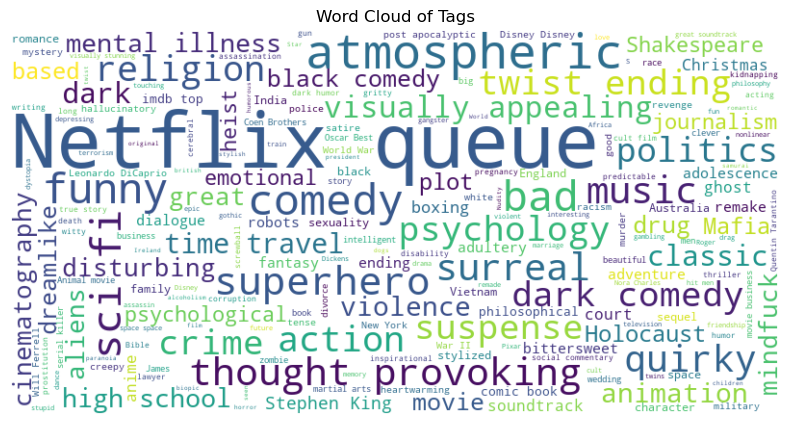

In [46]:
#Muhammed yousuf
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tags into a single string
tags_text = ' '.join(df_tags['tag'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,               # Set the width of the word cloud
    height=400,              # Set the height of the word cloud
    background_color='white' # Set the background color to white
).generate(tags_text)

# Create a figure for the plot with a specified size
plt.figure(figsize=(10, 5))

# Display the word cloud image with bilinear interpolation for smoother rendering
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis to remove any axis labels or ticks
plt.axis('off')

# Set the title for the word cloud plot
plt.title('Word Cloud of Tags')

# Show the word cloud plot
plt.show()


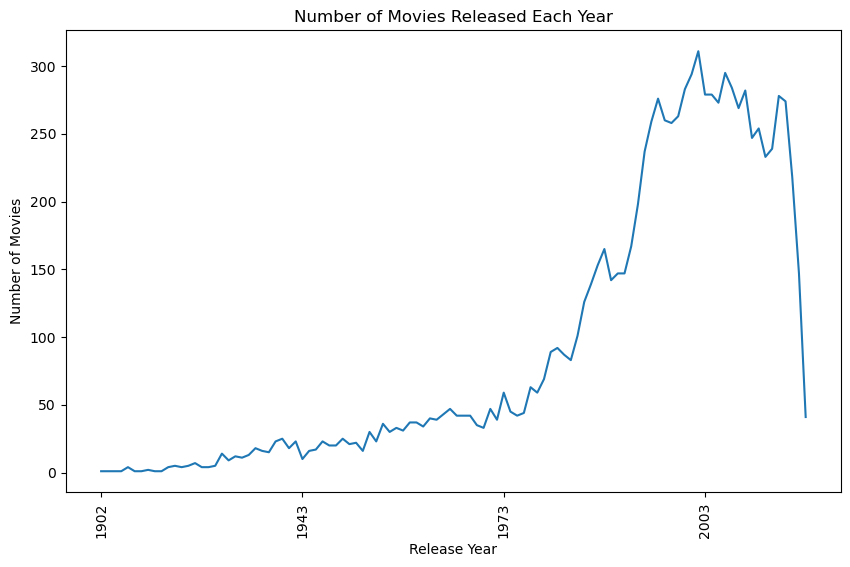

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_movie contains the movie data

# Line Plot (Number of Movies Released Each Year)
df_movie['year'] = df_movie['title'].str.extract(r'\((\d{4})\)')
# Extract the release year from the movie titles and store it in a new 'year' column
movie_counts_by_year = df_movie['year'].value_counts().sort_index()
# Count the number of movies released in each year and sort them by year

# Filter and display only labels at intervals of 30 years
x_labels = movie_counts_by_year.index[::30]
# Extract x-axis labels at intervals of 30 years

plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_counts_by_year.index, y=movie_counts_by_year.values)
# Create a line plot with release years on the x-axis and movie counts on the y-axis
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
# Set the title and axis labels for the plot
plt.xticks(rotation=90)
# Rotate x-axis labels for better readability
plt.xticks(ticks=x_labels, labels=x_labels)
# Set custom x-axis labels using the filtered x_labels
plt.show()
# Display the line plot


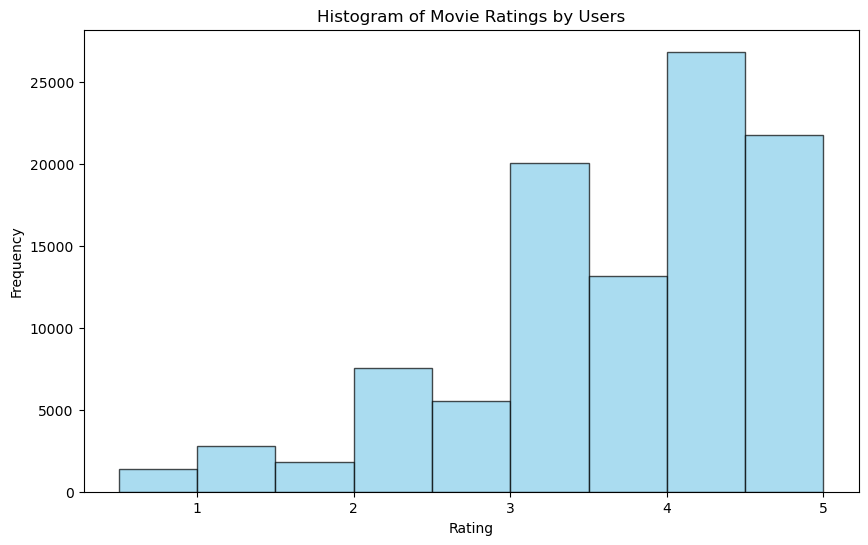

In [60]:
import matplotlib.pyplot as plt

# Assuming df_user contains user rating data
user_ratings = df_user['rating']

# Create a histogram
plt.figure(figsize=(10, 6))

# Plot the histogram with specified parameters
# 'bins' sets the number of bins or bars in the histogram
# 'edgecolor' specifies the color of the edges of the bars
# 'alpha' sets the transparency of the bars
# 'color' specifies the fill color of the bars
plt.hist(user_ratings, bins=9, edgecolor='black', alpha=0.7, color='skyblue')

# Set the title and labels for the plot
plt.title('Histogram of Movie Ratings by Users')  # Title of the plot
plt.xlabel('Rating')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

# Set the x-axis ticks to match the rating scale (in this case, 1 to 5)
plt.xticks(range(1, 6))

# Show the plot
plt.show()


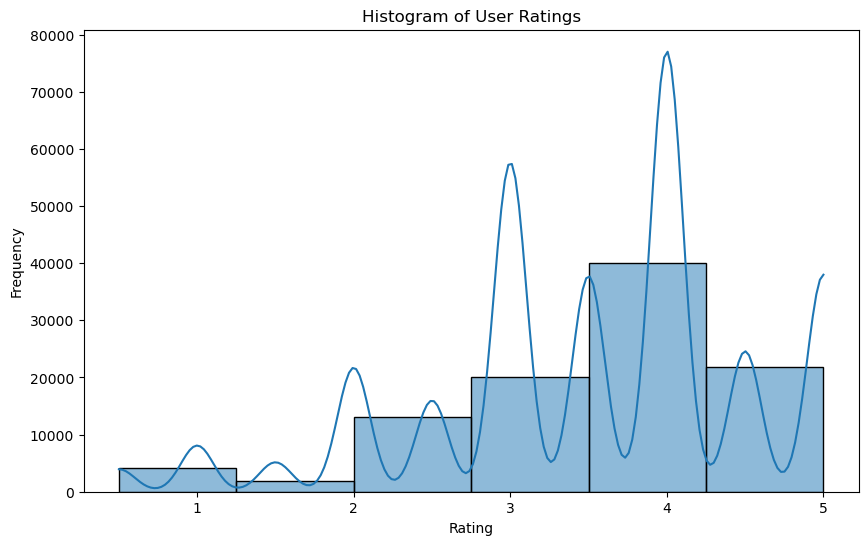

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_user contains the user data

# Create a histogram for user ratings
plt.figure(figsize=(10, 6))

# Use Seaborn's histplot function to create a histogram
# We specify the data to be plotted, set the number of bins to 6 for ratings from 0 to 5, and enable KDE (Kernel Density Estimation)
sns.histplot(df_user['rating'], bins=6, kde=True)

# Add a title to the plot
plt.title('Histogram of User Ratings')

# Label the x and y axes
plt.xlabel('Rating')  # x-axis label
plt.ylabel('Frequency')  # y-axis label

# Display the plot
plt.show()



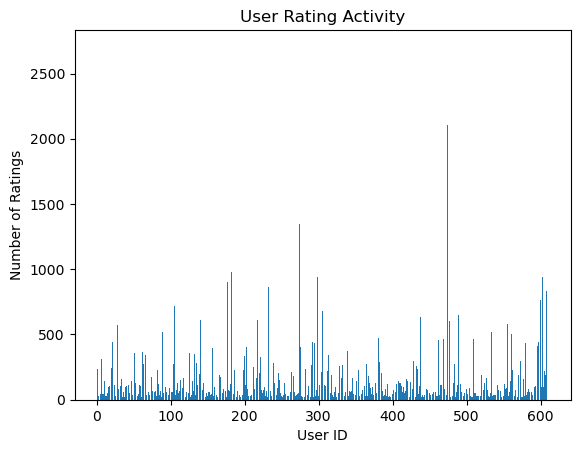

In [70]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df_user

# Count the number of ratings provided by each user and store it in user_activity
user_activity = df_user['userId'].value_counts()

# Create a vertical bar plot to visualize user activity
plt.bar(user_activity.index, user_activity.values)

# Set labels for the x and y axes
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')

# Set the title of the plot
plt.title('User Rating Activity')

# Display the plot
plt.show()


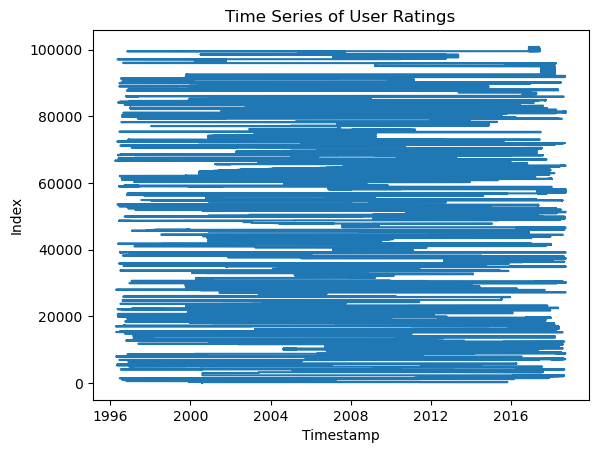

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming your DataFrame is named df_user
df_user['timestamp'] = pd.to_datetime(df_user['timestamp'], unit='s')
plt.plot(df_user['timestamp'], df_user.index)
plt.xlabel('Timestamp')
plt.ylabel('Index')
plt.title('Time Series of User Ratings')
plt.show()

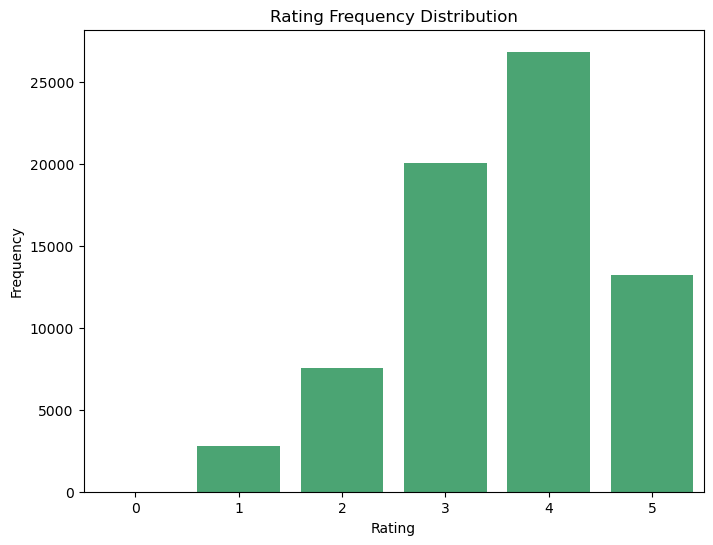

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_user

# Create a count plot to visualize the frequency of different ratings

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the count plot
sns.countplot(x='rating', data=df_user, color='mediumseagreen', order=range(6))

# Set labels and title
plt.xlabel('Rating')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Rating Frequency Distribution')  # Title of the plot

# Show the plot
plt.show()


